<a href="https://colab.research.google.com/github/asha8r/2015-Street-Tree-Census/blob/main/2015_Street_Tree_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the pandas library and giving it the alias 'pd'
# Pandas is used for data manipulation and analysis
import pandas as pd

# Importing the numpy library and giving it the alias 'np'
# Numpy is used for numerical operations on large, multi-dimensional arrays and matrices
import numpy as np

# Importing the pyplot module from matplotlib and giving it the alias 'plt'
# This module is used for plotting graphs and chart
import matplotlib.pyplot as plt

# Import seaborn for advanced data visualization, aliased as 'sns'
import seaborn as sns

# Imports Chi-Square test, Pearson correlation, and ANOVA functions from scipy.stats
from scipy.stats import chi2_contingency, pearsonr, f_oneway


In [2]:
# Load the dataset '2015_Street_Tree_Census_-_Tree_Data.csv' from the specified path using pandas
street_tree = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')

# Display the first five rows of the loaded dataset to get an overview of the data structure and contents
street_tree.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [3]:
# Display a concise summary of the 'street_tree' DataFrame, including the number of non-null entries in each column, data types of the columns, and memory usage
street_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [4]:
# Generate descriptive statistics for all columns (including categorical and numerical)
# This includes counts, unique values, mean, standard deviation, min, max, and quartiles
street_tree.describe(include='all')

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788,683788.000000,683788.000000,683788,683788,652172,652169,652169,...,6.837880e+05,683788,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
unique,NaN,NaN,483,NaN,NaN,2,3,3,132,132,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,10/27/2015,NaN,NaN,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,NaN,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6852,NaN,NaN,656896,652173,528850,87014,87014,...,NaN,683788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365205.011085,313793.096236,NaN,11.279787,0.432463,NaN,NaN,NaN,NaN,NaN,...,3.404914e+06,NaN,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,NaN,8.723042,3.290241,NaN,NaN,NaN,NaN,NaN,...,1.175863e+06,NaN,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,1.000201e+06,NaN,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,NaN,4.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,3.011700e+06,NaN,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,NaN,9.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.008100e+06,NaN,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,NaN,16.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,4.103202e+06,NaN,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09


In [5]:
# Retrieve the dimensions of the 'street_tree' DataFrame, providing the number of rows and columns it contains
street_tree.shape

(683788, 45)

In [6]:
# List all the column names in the 'street_tree' DataFrame
# This provides an overview of the different data fields available in the dataset
street_tree.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [7]:
# Create a new DataFrame 'street_tree_subset' by selecting specific columns from 'street_tree' for our Analysis
street_tree_subset =street_tree[['tree_id','created_at', 'tree_dbh',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'problems',
       'borocode', 'borough',
       'latitude', 'longitude'
          ]]

# Display the first five rows of 'street_tree_subset' to verify the selection and get an initial view of the subsetted data
street_tree_subset.head()

,tree_id,created_at,tree_dbh,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,borocode,borough,latitude,longitude
0,180683,08/27/2015,3,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,4,Queens,40.723092,-73.844215
1,200540,09/03/2015,21,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,4,Queens,40.794111,-73.818679
2,204026,09/05/2015,3,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,3,Brooklyn,40.717581,-73.936608
3,204337,09/05/2015,10,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,3,Brooklyn,40.713537,-73.934456
4,189565,08/30/2015,21,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,3,Brooklyn,40.666778,-73.975979


In [8]:
# Calculate the number of missing (null) values in each column of the 'street_tree_subset' DataFrame
# This is done by using the 'isnull()' method to identify null values and then summing them up with 'sum()'
missing_values = street_tree_subset.isnull().sum()

# Display the count of missing values for each column in 'street_tree_subset'
# This information is crucial for understanding the completeness of the dataset
missing_values

tree_id           0
created_at        0
tree_dbh          0
curb_loc          0
status            0
health        31616
spc_latin     31619
spc_common    31619
steward       31615
guards        31616
sidewalk      31616
problems      31664
borocode          0
borough           0
latitude          0
longitude         0
dtype: int64

In [9]:
# Check for duplicate rows in the 'street_tree_subset' DataFrame
# The 'duplicated()' method is used to identify duplicates, and 'sum()' counts the total number of duplicate rows found
duplicate_rows = street_tree_subset.duplicated().sum()

# Display the total count of duplicate rows in 'street_tree_subset'
# This helps in assessing data integrity and deciding if duplicates need to be removed
duplicate_rows

0

In [10]:
# Print the frequency distribution of values in the 'health', 'sidewalk', 'steward', and 'guards columns of 'street_tree_subset'
# This shows the count of trees in each category
print(street_tree_subset['health'].value_counts(),'\n\n')
print(street_tree_subset['sidewalk'].value_counts(),'\n\n')
print(street_tree_subset['steward'].value_counts(),'\n\n')
print(street_tree_subset['guards'].value_counts(),'\n\n')


Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64 


NoDamage    464978
Damage      187194
Name: sidewalk, dtype: int64 


None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64 


None       572306
Helpful     51866
Harmful     20252
Unsure       7748
Name: guards, dtype: int64 




In [ ]:

# Fill missing values in the 'health' column with 'Good'. This assumes that unreported health status defaults to 'Good'
street_tree_subset['health'].fillna('Good', inplace=True)

# Fill missing values in the 'problems' column with 'None', indicating no reported problems for those entries
street_tree_subset['problems'].fillna('None', inplace=True)

# Replace missing values in the 'spc_latin' column (Latin name of species) with 'Unknown'
street_tree_subset['spc_latin'].fillna('UnKnown', inplace=True)

# Fill missing values in the 'sidewalk' column with 'NoDamage', implying no damage to sidewalks where the condition is not reported
street_tree_subset['sidewalk'].fillna('NoDamage', inplace=True)

# Replace missing values in the 'steward' column (indicating the level of care or stewardship) with 'None'
street_tree_subset['steward'].fillna('None', inplace=True)

# Fill missing values in the 'guards' column with 'None', suggesting no tree guards are present when not reported
street_tree_subset['guards'].fillna('None', inplace=True)

# Replace missing values in the 'spc_common' column (common name of species) with 'Unknown'
street_tree_subset['spc_common'].fillna('Unknown', inplace=True)


In [12]:
# Re-calculate the number of missing (null) values in each column of the updated 'street_tree_subset' DataFrame
# This is to verify that the missing values have been appropriately filled
missing_values = street_tree_subset.isnull().sum()

# Display the updated count of missing values for each column in 'street_tree_subset'
# This helps confirm the effectiveness of the data cleaning process
missing_values


tree_id       0
created_at    0
tree_dbh      0
curb_loc      0
status        0
health        0
spc_latin     0
spc_common    0
steward       0
guards        0
sidewalk      0
problems      0
borocode      0
borough       0
latitude      0
longitude     0
dtype: int64

In [13]:
# Display the current state of the 'street_tree_subset' DataFrame
# This is to review the data after performing the previous data cleaning and imputation steps
# ensuring that the dataset is now ready for further analysis or processing
street_tree_subset


,tree_id,created_at,tree_dbh,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,borocode,borough,latitude,longitude
0,180683,08/27/2015,3,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,4,Queens,40.723092,-73.844215
1,200540,09/03/2015,21,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,4,Queens,40.794111,-73.818679
2,204026,09/05/2015,3,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,3,Brooklyn,40.717581,-73.936608
3,204337,09/05/2015,10,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,3,Brooklyn,40.713537,-73.934456
4,189565,08/30/2015,21,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,3,Brooklyn,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,3,Brooklyn,40.713211,-73.954944
683784,183795,08/29/2015,7,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,None,4,Queens,40.715194,-73.856650
683785,166161,08/22/2015,12,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,None,5,Staten Island,40.620762,-74.136517
683786,184028,08/29/2015,9,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,None,2,Bronx,40.850828,-73.903115


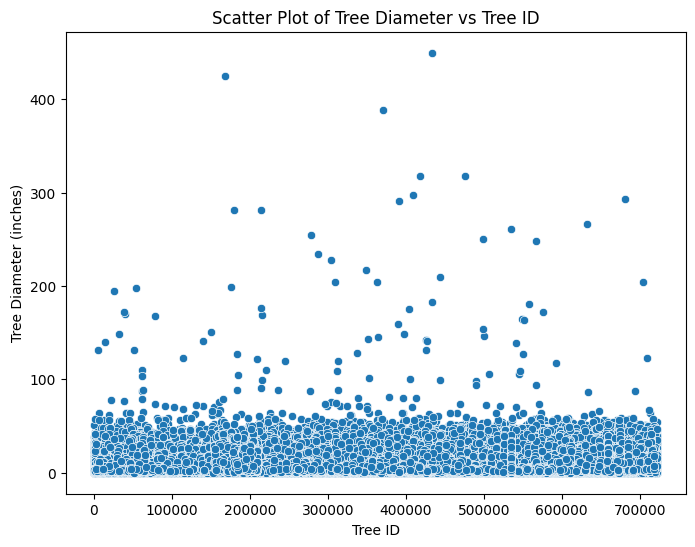

In [14]:
# Plotting tree_dbh against tree_id
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tree_id', y='tree_dbh', data = street_tree_subset)
plt.title('Scatter Plot of Tree Diameter vs Tree ID')
plt.xlabel('Tree ID')
plt.ylabel('Tree Diameter (inches)')
plt.show()


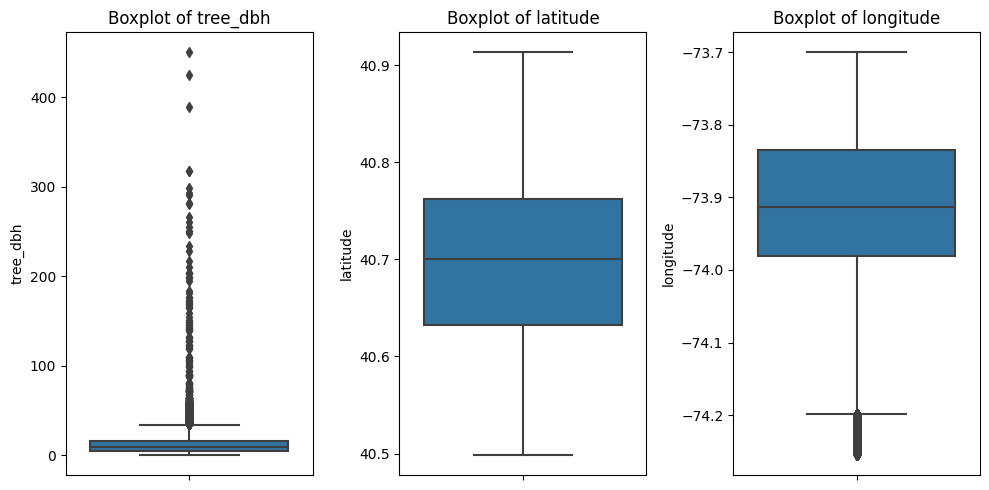

In [56]:
# Checking for outliers in the numerical columns
numerical_columns = ['tree_dbh','latitude', 'longitude']

# Plotting boxplots for each numerical column to visualize outliers
plt.figure(figsize=(10, 5))

for i, col in enumerate(numerical_columns, 1): # Loop through each numerical column
    plt.subplot(1, len(numerical_columns), i)  # Create a subplot for each numerical column
    sns.boxplot(y=street_tree_subset[col])   # Plot a boxplot for the current column
    plt.title(f'Boxplot of {col}')  # Set the title of the boxplot using the column name

plt.tight_layout() # Adjust the layout to prevent overlapping of plot elements
plt.show()  # Display the boxplots


In [16]:
# Generate descriptive statistics for the 'tree_dbh' column of the 'street_tree_subset' DataFrame
# This includes count, mean, standard deviation, minimum, maximum, and various percentiles
# The 'tree_dbh' column likely represents the diameter at breast height (DBH) of the trees, a common measure in forestry
street_tree_subset['tree_dbh'].describe()

count    683788.000000
mean         11.279787
std           8.723042
min           0.000000
25%           4.000000
50%           9.000000
75%          16.000000
max         450.000000
Name: tree_dbh, dtype: float64

In [17]:
# Generate descriptive statistics for the 'longitude' column in the 'street_tree_subset' DataFrame
# This includes the count, mean, standard deviation, minimum, maximum, and various percentiles
# The 'longitude' column represents the longitudinal geographic coordinates of the trees
street_tree_subset['longitude'].describe()

count    683788.000000
mean        -73.924060
std           0.123583
min         -74.254965
25%         -73.980500
50%         -73.912911
75%         -73.834910
max         -73.700488
Name: longitude, dtype: float64

In [18]:
# Identifying outliers in 'tree_dbh' using IQR method
Q1 = street_tree_subset['tree_dbh'].quantile(0.25)
Q3 = street_tree_subset['tree_dbh'].quantile(0.75)
IQR = Q3 - Q1

# Defining thresholds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identifying outliers
outliers = street_tree_subset[(street_tree_subset['tree_dbh'] < lower_threshold) | (street_tree_subset['tree_dbh'] > upper_threshold)]


# Handling outliers - Remove them
street_tree_no_outliers = street_tree_subset[~(street_tree_subset['tree_dbh'] < lower_threshold) & ~(street_tree_subset['tree_dbh'] > upper_threshold)]


# Checking the shape of the original and the cleaned dataset
original_shape = street_tree_subset.shape
cleaned_shape = street_tree_no_outliers.shape

# Displays values
print('original_shape', original_shape)
print('cleaned_shape', cleaned_shape)
print('tree_dbh Description \n', outliers['tree_dbh'].describe())

original_shape (683788, 16)
cleaned_shape (673530, 16)
tree_dbh Description 
 count    10258.000000
mean        39.961298
std         14.538159
min         35.000000
25%         36.000000
50%         38.000000
75%         40.000000
max        450.000000
Name: tree_dbh, dtype: float64


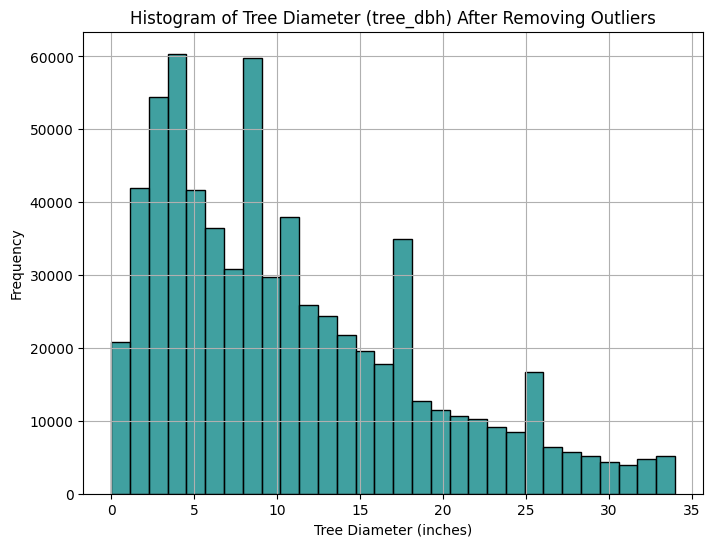

In [19]:
# Creating a histogram for tree diameters ('tree_dbh') after removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(street_tree_no_outliers['tree_dbh'], bins=30, color='teal') # Plots a histogram of 'tree_dbh' with 30 bins and in teal color
plt.title('Histogram of Tree Diameter (tree_dbh) After Removing Outliers') # Adds a title to the histogram
plt.xlabel('Tree Diameter (inches)')   # Sets the label for the x-axis
plt.ylabel('Frequency')  # Sets the label for the y-axis
plt.grid(True) # Enables the grid for better readability of the plot
plt.show() # Displays the histogram

In [20]:
# For latitude and longitude, since they are geographical data, their range should be within the bounds of the city/region of interest
# Checking the min and max values to see if there are any unrealistic coordinates
lat_long_summary = street_tree_subset[['latitude', 'longitude']].agg(['min', 'max'])
lat_long_summary


,latitude,longitude
min,40.498466,-74.254965
max,40.912918,-73.700488


In [21]:
# The DataFrame 'street_tree_no_outliers' is likely a modified version of the original street tree dataset where outliers have been removed
street_tree_no_outliers

,tree_id,created_at,tree_dbh,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,borocode,borough,latitude,longitude
0,180683,08/27/2015,3,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,4,Queens,40.723092,-73.844215
1,200540,09/03/2015,21,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,4,Queens,40.794111,-73.818679
2,204026,09/05/2015,3,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,3,Brooklyn,40.717581,-73.936608
3,204337,09/05/2015,10,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,3,Brooklyn,40.713537,-73.934456
4,189565,08/30/2015,21,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,3,Brooklyn,40.666778,-73.975979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,08/18/2015,25,OnCurb,Alive,Good,Quercus palustris,pin oak,None,None,Damage,None,3,Brooklyn,40.713211,-73.954944
683784,183795,08/29/2015,7,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,1or2,None,NoDamage,None,4,Queens,40.715194,-73.856650
683785,166161,08/22/2015,12,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,Damage,None,5,Staten Island,40.620762,-74.136517
683786,184028,08/29/2015,9,OnCurb,Alive,Good,Acer rubrum,red maple,None,None,NoDamage,None,2,Bronx,40.850828,-73.903115


In [22]:
# Creating a new column 'tree_size_category' based on 'tree_dbh' (tree diameter)
def categorize_tree_size(dbh):

#Categorize tree size based on diameter at breast height (dbh)
    if dbh < 12:
        return 'Small'
    elif 12 <= dbh < 24:
        return 'Medium'
    else:
        return 'Large'

# Applying the categorization function to the 'tree_dbh' column
street_tree_no_outliers['tree_size_category'] = street_tree_no_outliers['tree_dbh'].apply(categorize_tree_size)


<ipython-input-22-e54b296bc126>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_tree_no_outliers['tree_size_category'] = street_tree_no_outliers['tree_dbh'].apply(categorize_tree_size)


In [23]:
# Displaying the first few rows to verify the new column
street_tree_no_outliers[['tree_dbh', 'tree_size_category']]

,tree_dbh,tree_size_category
0,3,Small
1,21,Medium
2,3,Small
3,10,Small
4,21,Medium
...,...,...
683783,25,Large
683784,7,Small
683785,12,Medium
683786,9,Small


In [24]:
# calculates and returns the frequency count of each unique value in the newly created 'tree_size_category' column
street_tree_no_outliers['tree_size_category'].value_counts()

Small     414038
Medium    198693
Large      60799
Name: tree_size_category, dtype: int64

In [25]:
# displays the first five rows of the 'street_tree_no_outliers' DataFrame, including newly created column 'tree_size_category'
street_tree_no_outliers.head()

,tree_id,created_at,tree_dbh,curb_loc,status,health,spc_latin,spc_common,steward,guards,sidewalk,problems,borocode,borough,latitude,longitude,tree_size_category
0,180683,08/27/2015,3,OnCurb,Alive,Fair,Acer rubrum,red maple,None,None,NoDamage,None,4,Queens,40.723092,-73.844215,Small
1,200540,09/03/2015,21,OnCurb,Alive,Fair,Quercus palustris,pin oak,None,None,Damage,Stones,4,Queens,40.794111,-73.818679,Medium
2,204026,09/05/2015,3,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,1or2,None,Damage,None,3,Brooklyn,40.717581,-73.936608,Small
3,204337,09/05/2015,10,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,None,None,Damage,Stones,3,Brooklyn,40.713537,-73.934456,Small
4,189565,08/30/2015,21,OnCurb,Alive,Good,Tilia americana,American linden,None,None,Damage,Stones,3,Brooklyn,40.666778,-73.975979,Medium


In [52]:
# Descriptive Analysis
# Distribution of tree health
health_distribution = street_tree_no_outliers['health'].value_counts()

# Most common tree species
common_species = street_tree_no_outliers['spc_common'].value_counts().head(10)

# Temporal Analysis
# Number of tree records by year
borough_distribution = street_tree_no_outliers['borough'].value_counts()

# Converting 'created_at' to Datetime Format
street_tree_no_outliers['created_at'] = pd.to_datetime(street_tree_no_outliers['created_at'])
street_tree_no_outliers['year'] = street_tree_no_outliers['created_at'].dt.year

# Checking the Data Type of 'created_at'
print(street_tree_no_outliers['created_at'].dtype)

# Checking the Data Type of the New 'year' Column
print(street_tree_no_outliers['year'].dtype)

# Calculating the Yearly Distribution
yearly_distribution = street_tree_no_outliers['year'].value_counts()


datetime64[ns]
int64


<ipython-input-52-06baa60c11b6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_tree_no_outliers['created_at'] = pd.to_datetime(street_tree_no_outliers['created_at'])
<ipython-input-52-06baa60c11b6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_tree_no_outliers['year'] = street_tree_no_outliers['created_at'].dt.year


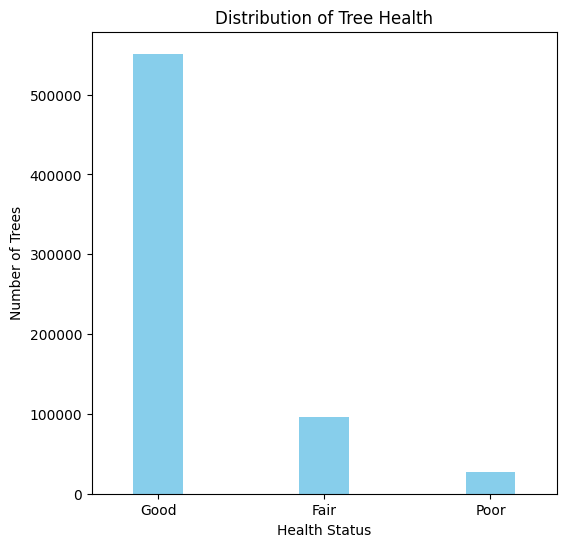

In [27]:
# Tree Health Distribution Bar Chart
plt.figure(figsize=(6, 6))
health_distribution.plot(kind='bar', color='skyblue', width=0.3)  # Creates a bar chart with sky blue color and bar width set to 0.3
plt.title('Distribution of Tree Health') # Adds a title to the bar chart
plt.xlabel('Health Status')  # Sets the label for the x-axis
plt.ylabel('Number of Trees')  # Sets the label for the y-axis
plt.xticks(rotation=0) # Sets the rotation of the x-axis tick labels to 0 degrees for better readability
plt.show() # Displays the bar chart

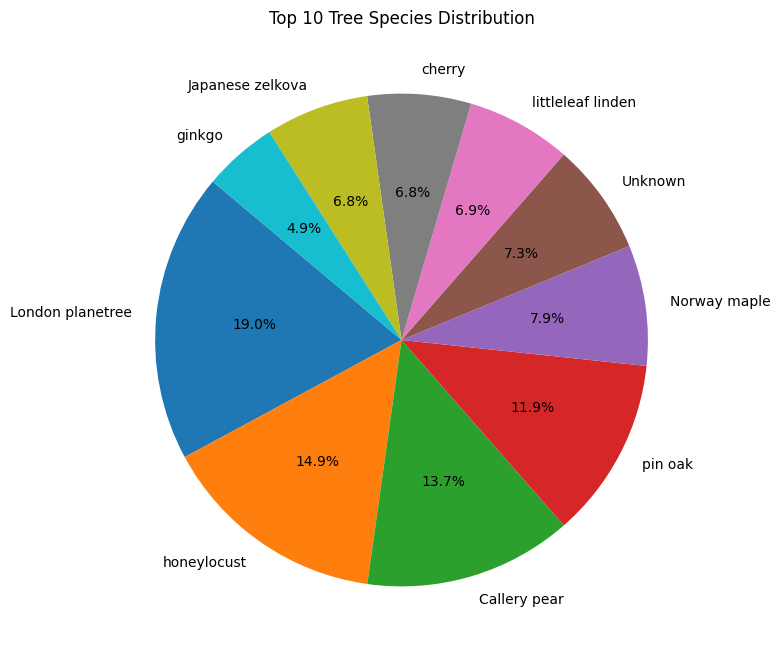

In [28]:
# Tree Species Distribution Pie Chart (Top 10 Species)
plt.figure(figsize=(8, 8))
common_species.plot(kind='pie', autopct='%1.1f%%', startangle=140) # Plots a pie chart of 'common_species' with percentage labels and starts at a 140-degree angle
plt.title('Top 10 Tree Species Distribution') # Adds a title to the pie chart
plt.ylabel('') # Removes the y-axis label
plt.show() # Displays the pie chart

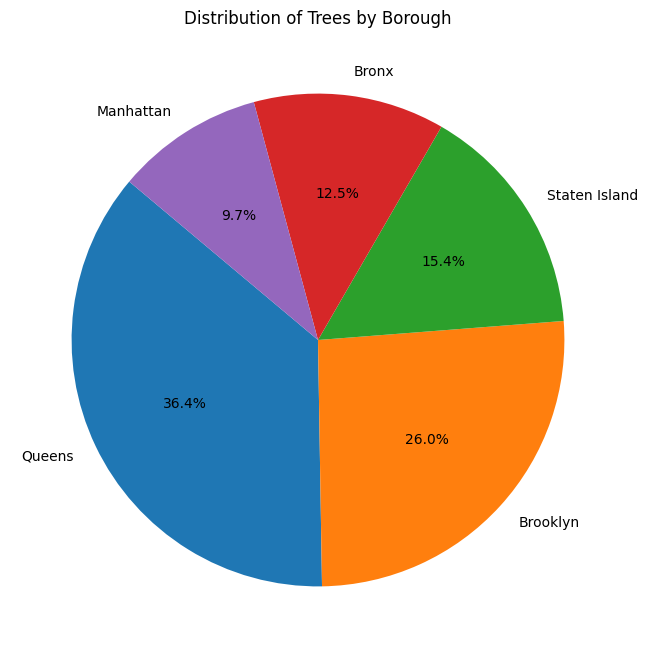

In [29]:
# Distribution of Trees by Borough Pie Chart
plt.figure(figsize=(8, 8)) # Sets the size of the figure for the bar chart
borough_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140) # Creates a pie chart from 'borough_distribution' data, showing percentages with one decimal place, and starts the first segment at a 140-degree angle
plt.title('Distribution of Trees by Borough')  # Adds a title to the pie chart
plt.ylabel('') # Removes the y-axis label
plt.show() # Displays the pie chart

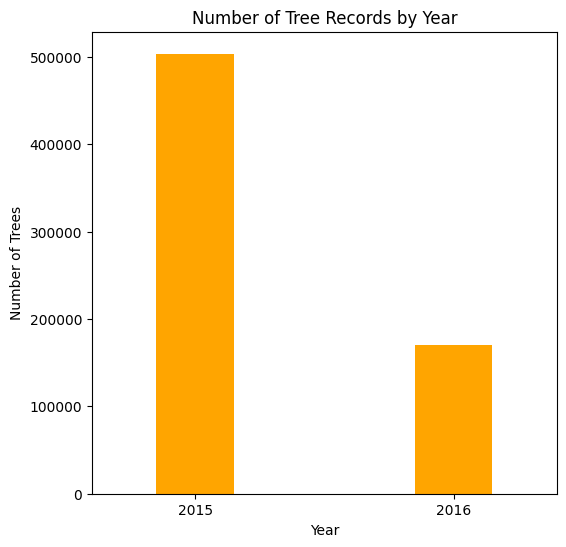

In [30]:
# Number of Tree Records by Year
plt.figure(figsize=(6, 6)) # Sets the size of the figure for the bar chart, 6x6 inches for a square shape
yearly_distribution.plot(kind='bar', color='orange', width=0.3) # Creates a bar chart from 'yearly_distribution' data, in orange color, with bar width set to 0.3
plt.title('Number of Tree Records by Year') # Adds a title to the bar chart
plt.xlabel('Year') # Sets the label for the x-axis
plt.ylabel('Number of Trees') # Sets the label for the y-axis
plt.xticks(rotation=0) # Sets the rotation of x-axis tick labels to 0 degrees for better readability
plt.show() # Displays the bar chart

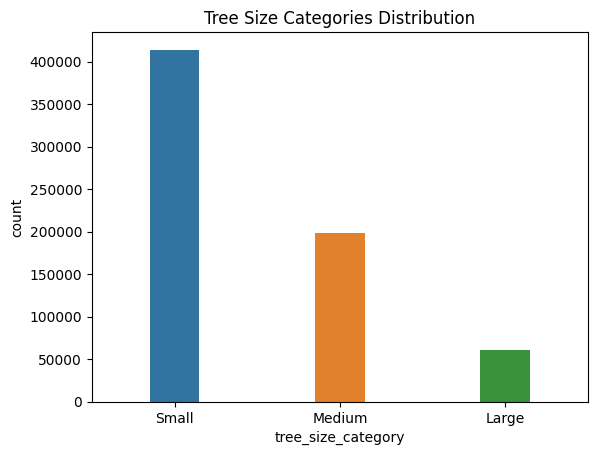

In [31]:
# Bar chart for tree size category frequency
sns.countplot(x='tree_size_category', data=street_tree_no_outliers, width=0.3) ## Creates a count plot for the 'tree_size_category' column in the 'street_tree_no_outliers' DataFrame, with each bar's width set to 0.3
plt.title('Tree Size Categories Distribution') # Adds a title to the count plot
plt.show() # Displays the plot


In [32]:
# Frequency Analysis for categorical columns
frequency_analysis = {} # Initializes an empty dictionary to store frequency analysis results
categorical_columns = ['health', 'borough', 'tree_size_category', 'spc_latin', 'spc_common'] # List of categorical columns to analyze
for col in categorical_columns: # Loop through each categorical column
    counts = street_tree_no_outliers[col].value_counts() # Count the frequency of each unique value in the column
    print(f"{counts}\n\n") # Print the frequency counts for each category in the column


Good    551229
Fair     95632
Poor     26669
Name: health, dtype: int64


Queens           244966
Brooklyn         174935
Staten Island    103835
Bronx             84510
Manhattan         65284
Name: borough, dtype: int64


Small     414038
Medium    198693
Large      60799
Name: tree_size_category, dtype: int64


Platanus x acerifolia                 81853
Gleditsia triacanthos var. inermis    64218
Pyrus calleryana                      58902
Quercus palustris                     51141
Acer platanoides                      34096
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 133, dtype: int64


London planetree    81853
honeylocust         64218
Callery pear        58902
pin oak             51141
Norway maple        34096
                    ...  

In [33]:
# Borough-Specific Analysis
grouped_analysis_borough = street_tree_subset.groupby('borough')['tree_dbh'].mean() # Groups the data by 'borough' and calculates the average tree diameter (dbh) for each borough
print('grouped_analysis_borough\n\n', grouped_analysis_borough) # Prints the results of the grouped analysis


grouped_analysis_borough

 borough
Bronx             9.693649
Brooklyn         11.738884
Manhattan         8.473641
Queens           12.557870
Staten Island    10.492746
Name: tree_dbh, dtype: float64


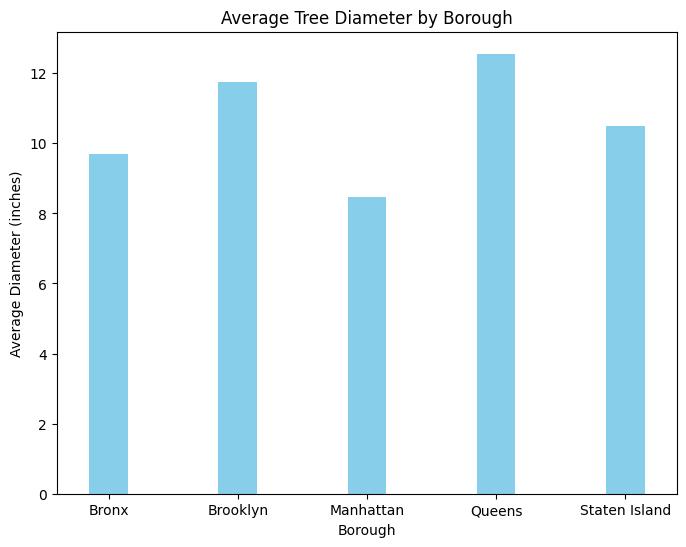

In [34]:
# Average Tree Diameter by Borough bar chart
plt.figure(figsize=(8, 6))
grouped_analysis_borough.plot(kind='bar', color='skyblue', width = 0.3)
plt.title('Average Tree Diameter by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Diameter (inches)')
plt.xticks(rotation=0)
plt.show()

In [35]:
# Average diameter and health status counts per borough
grouped_analysis_health = street_tree_subset.groupby('health')['tree_dbh'].mean()
print('grouped_analysis_health\n\n', grouped_analysis_health )

grouped_analysis_health

 health
Fair    10.990487
Good    11.437102
Poor     9.033112
Name: tree_dbh, dtype: float64


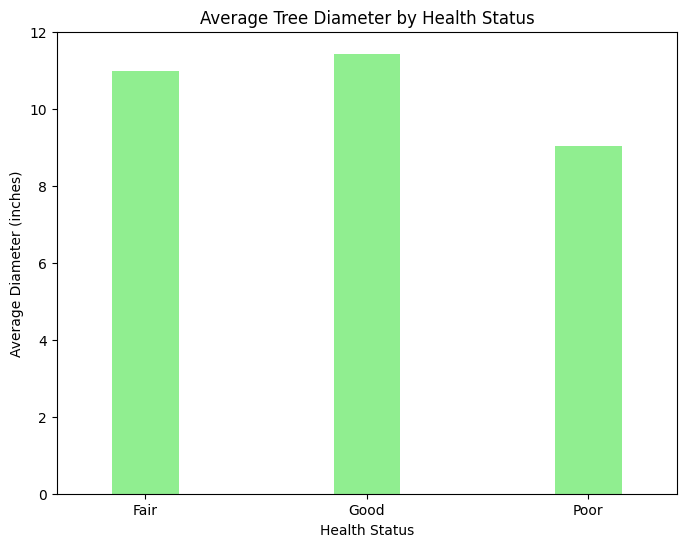

In [36]:
# Average Tree Diameter by Health Status bar chart
plt.figure(figsize=(8, 6))
grouped_analysis_health.plot(kind='bar', color='lightgreen', width = 0.3)
plt.title('Average Tree Diameter by Health Status')
plt.xlabel('Health Status')
plt.ylabel('Average Diameter (inches)')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Temporal Analysis: Analyzing the trend of tree health over time
# Extracting year for trend analysis
street_tree_no_outliers['year'] = street_tree_no_outliers['created_at'].dt.year
health_trend = street_tree_no_outliers.groupby('year')['health'].value_counts().unstack().fillna(0)

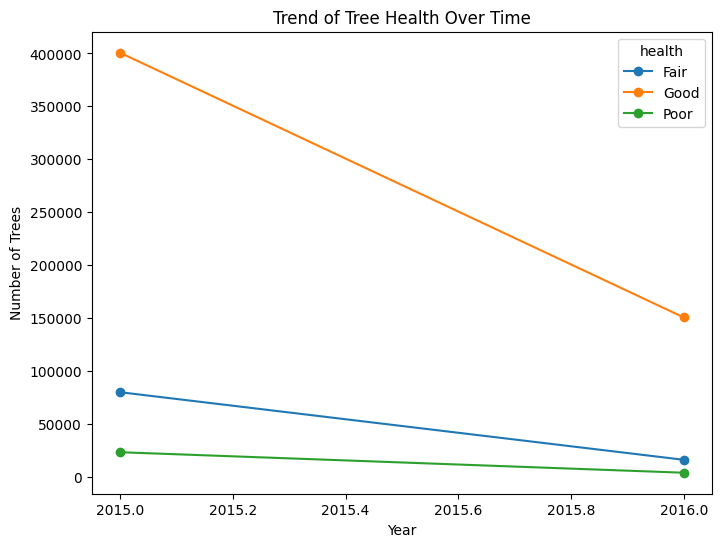

In [38]:
# Plotting the trend of tree health over time
health_trend.plot(kind='line', figsize=(8, 6), marker='o', title='Trend of Tree Health Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Trees')
plt.show()

In [39]:

# 1. Comparing Tree Health Across Boroughs
# Creating a contingency table for health status across boroughs
health_borough_contingency = pd.crosstab(street_tree_no_outliers['borough'], street_tree_no_outliers['health'])

# 2. Tree Diameter and Health Relationship
# Preparing data for correlation test
diameter = street_tree_no_outliers['tree_dbh']

# Converting health to a numeric scale for correlation: Good=2, Fair=1, Poor=0
health_numeric = street_tree_no_outliers['health'].map({'Good': 2, 'Fair': 1, 'Poor': 0})

# 3. Species Distribution Across Boroughs
# Preparing data for ANOVA test
species_borough_groups = [group['tree_dbh'].values for name, group in street_tree_no_outliers.groupby('borough')]



In [40]:
# Performing the hypothesis tests

# 1. Chi-Square Test for Health Across Boroughs
chi2, p_health_borough, dof, expected = chi2_contingency(health_borough_contingency)
print('Chi-square statistic: {:.2f}\np-value: {:.2e}'.format(chi2, p_health_borough))
print()
# 2. Pearson Correlation for Diameter and Health
corr, p_corr = pearsonr(diameter, health_numeric)
print('Correlation coefficient: {:.2f}\np-value: {:.2e}'.format(corr, p_corr))
print()
# 3. ANOVA for Species Distribution Across Boroughs
f_stat, p_species_borough = f_oneway(*species_borough_groups)
print('F-statistic: {:.2f}\np-value: {:.2e}'.format(f_stat, p_species_borough))


Chi-square statistic: 1349.09
p-value: 5.74e-286

Correlation coefficient: 0.05
p-value: 1.16e-301

F-statistic: 4041.06
p-value: 0.00e+00


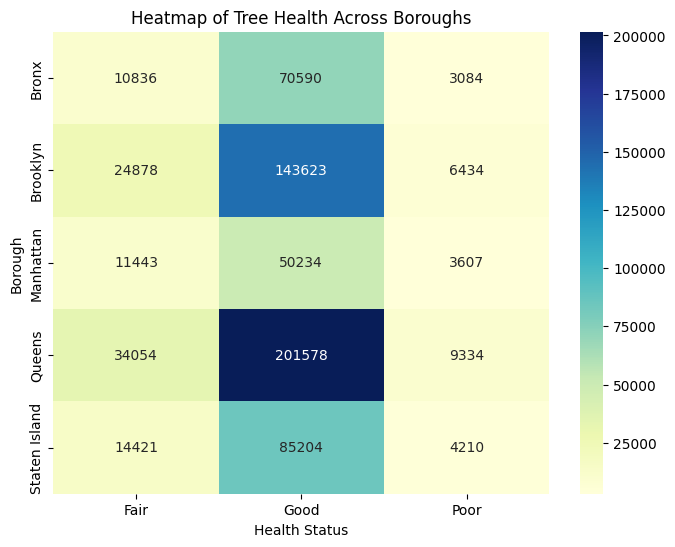

In [41]:
# Heatmap of Tree Health Across Boroughs
plt.figure(figsize=(8, 6))
sns.heatmap(health_borough_contingency, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Tree Health Across Boroughs')
plt.ylabel('Borough')
plt.xlabel('Health Status')
plt.show()

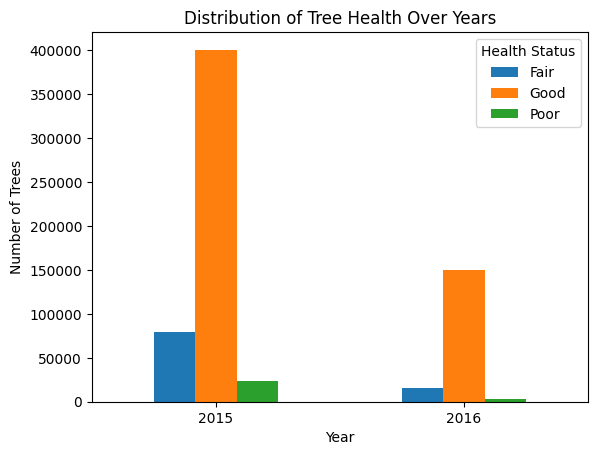

In [42]:
# Distribution of Tree Health in Different Years
health_year_distribution = street_tree_no_outliers.groupby(['year', 'health']).size().unstack()
health_year_distribution.plot(kind='bar')
plt.title('Distribution of Tree Health Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Trees')
plt.legend(title='Health Status')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x1000 with 0 Axes>

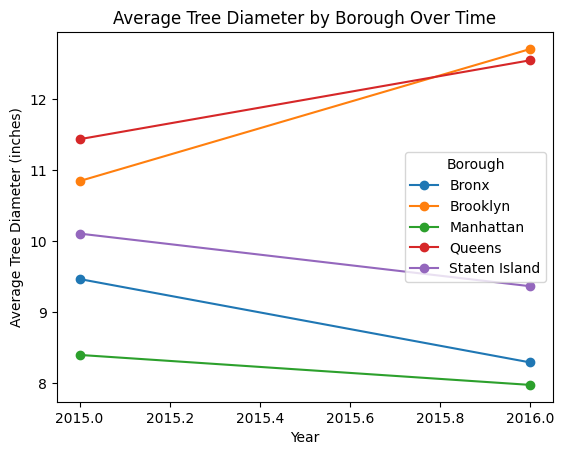

In [43]:
# Average Tree Diameter by Borough Over Time
diameter_borough_year = street_tree_no_outliers.groupby(['year', 'borough'])['tree_dbh'].mean().unstack()
plt.figure(figsize=(12, 10))
diameter_borough_year.plot(marker='o')
plt.title('Average Tree Diameter by Borough Over Time')
plt.xlabel('Year')
plt.ylabel('Average Tree Diameter (inches)')
plt.legend(title='Borough')
plt.show()


<Figure size 1000x600 with 0 Axes>

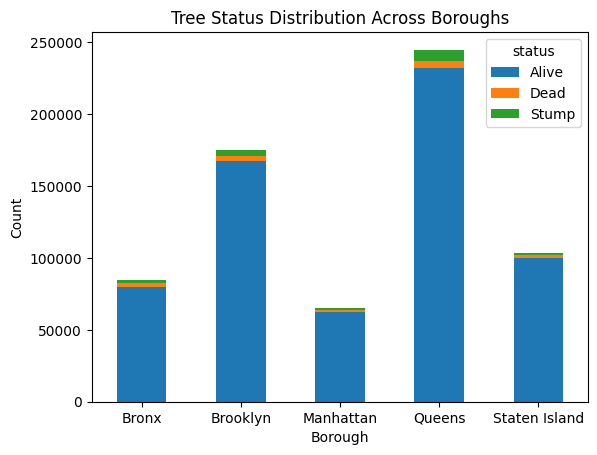

F_onewayResult(statistic=22669.660345332708, pvalue=0.0)

In [44]:

# Statistical Test - ANOVA for diameter differences across statuses
alive_diameter = street_tree_no_outliers[street_tree_no_outliers['status'] == 'Alive']['tree_dbh']
dead_diameter = street_tree_no_outliers[street_tree_no_outliers['status'] == 'Dead']['tree_dbh']
stump_diameter = street_tree_no_outliers[street_tree_no_outliers['status'] == 'Stump']['tree_dbh']
anova_diameter_result = f_oneway(alive_diameter, dead_diameter, stump_diameter)

# Geographical Distribution Analysis - Tree statuses across boroughs
status_by_borough = street_tree_no_outliers.groupby('borough')['status'].value_counts().unstack()

# Status distribution across boroughs (Stacked Bar Chart)
plt.figure(figsize=(10, 6))
status_by_borough.plot(kind='bar', stacked=True)
plt.title('Tree Status Distribution Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
print()
anova_diameter_result



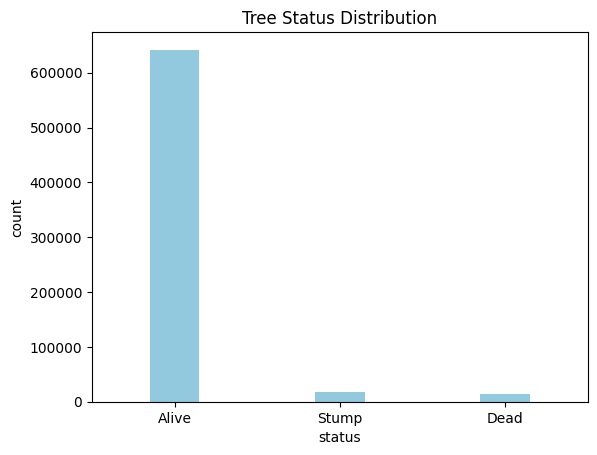

In [45]:
# Bar Chart for Tree Status ('status')
sns.countplot(x='status', data=street_tree_no_outliers,color='skyblue', width=0.3)
plt.title('Tree Status Distribution')
plt.show()


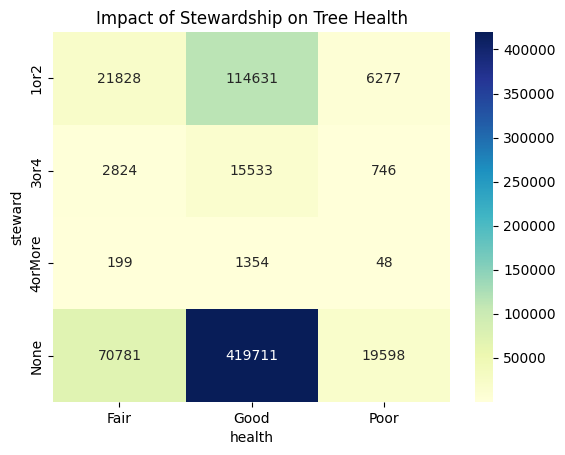

In [46]:
# Impact of Stewardship on Tree Health
steward_health = street_tree_no_outliers.groupby(['steward', 'health']).size().unstack()
sns.heatmap(steward_health, annot=True,fmt=".0f", cmap="YlGnBu")
plt.title('Impact of Stewardship on Tree Health')
plt.show()

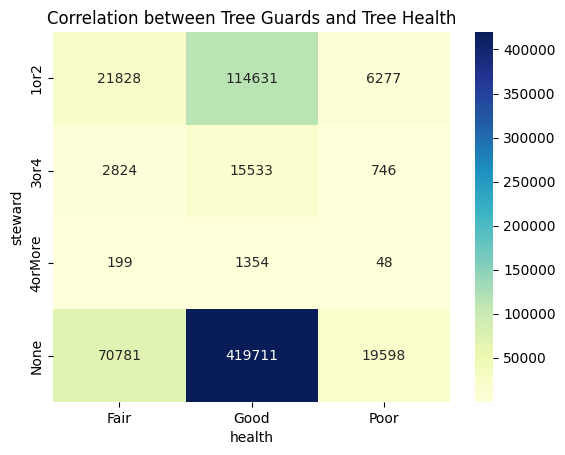

In [47]:
# Correlation between Tree Guards and Tree Health
guards_health = street_tree_no_outliers.groupby(['guards', 'health']).size().unstack()
sns.heatmap(steward_health, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Correlation between Tree Guards and Tree Health')
plt.show()

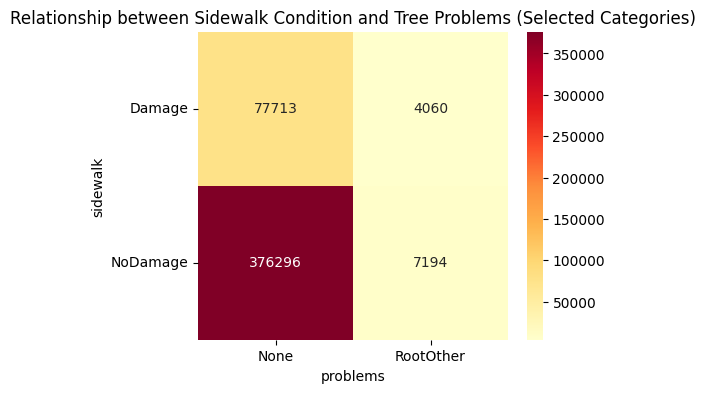

In [48]:
# Selecting key labels
selected_sidewalk_conditions = ['NoDamage', 'Damage']
selected_problems = ['RootOther', 'None']

# Filter the data
filtered_data = street_tree_no_outliers[street_tree_no_outliers['sidewalk'].isin(selected_sidewalk_conditions) &
                                        street_tree_no_outliers['problems'].isin(selected_problems)]

# Group and create a contingency table
sidewalk_problems_filtered = filtered_data.groupby(['sidewalk', 'problems']).size().unstack()

# Plotting the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(sidewalk_problems_filtered, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title('Relationship between Sidewalk Condition and Tree Problems (Selected Categories)')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()
